In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History



Using TensorFlow backend.


In [5]:
df=pd.read_csv('voice.csv')

In [6]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [7]:
df.tail()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female
3167,0.165509,0.092884,0.183044,0.070072,0.250827,0.180756,1.705029,5.769115,0.938829,0.601529,...,0.165509,0.185607,0.062257,0.271186,0.227022,0.007812,0.554688,0.546875,0.350000,female


In [8]:
df.shape

(3168, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.9+ KB


In [10]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [11]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

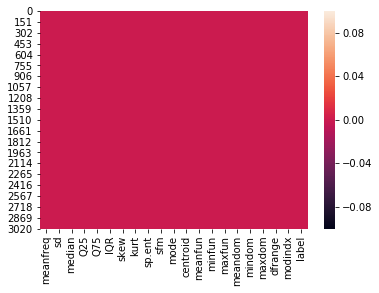

In [12]:
sns.heatmap(df.isnull())

In [13]:
df.duplicated().sum().sum()

2

In [14]:
df=df.drop_duplicates()

In [16]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000
mean,0.180886,0.057130,0.185593,0.140440,0.224748,0.084308,3.140895,36.587139,0.895144,0.408348,0.165248,0.180886,0.142811,0.036801,0.258837,0.828868,0.052631,5.044220,4.991589,0.173751
std,0.029916,0.016656,0.036354,0.048687,0.023636,0.042790,4.241768,134.969236,0.044988,0.177476,0.077212,0.029916,0.032314,0.019225,0.030085,0.525009,0.063301,3.517226,3.516072,0.119484
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163649,0.041942,0.169578,0.111086,0.208740,0.042538,1.649353,5.666817,0.861823,0.258126,0.118008,0.163649,0.116990,0.018223,0.253968,0.419640,0.007812,2.070312,2.041016,0.099726
50%,0.184814,0.059162,0.190016,0.140255,0.225668,0.094280,2.197623,8.327893,0.901823,0.396472,0.186530,0.184814,0.140585,0.046110,0.271186,0.765625,0.023438,4.992188,4.945312,0.139357
75%,0.199118,0.067023,0.210588,0.175931,0.243640,0.114168,2.932527,13.649803,0.928717,0.533795,0.221070,0.199118,0.169605,0.047904,0.277457,1.176824,0.070312,7.005859,6.992188,0.209141
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


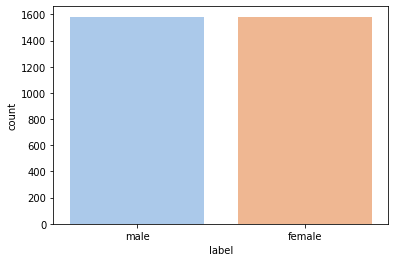

In [18]:
sns.countplot(df.label,palette='pastel')

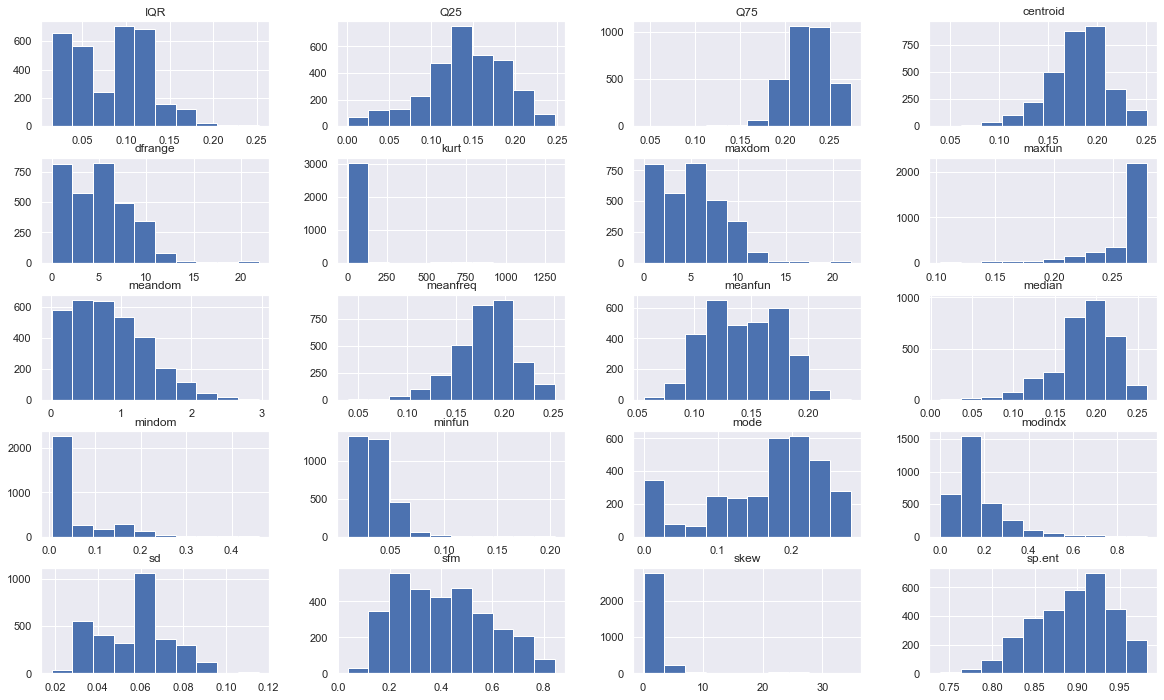

In [21]:
sns.set()
df.hist(figsize=(20,12))
plt.show()

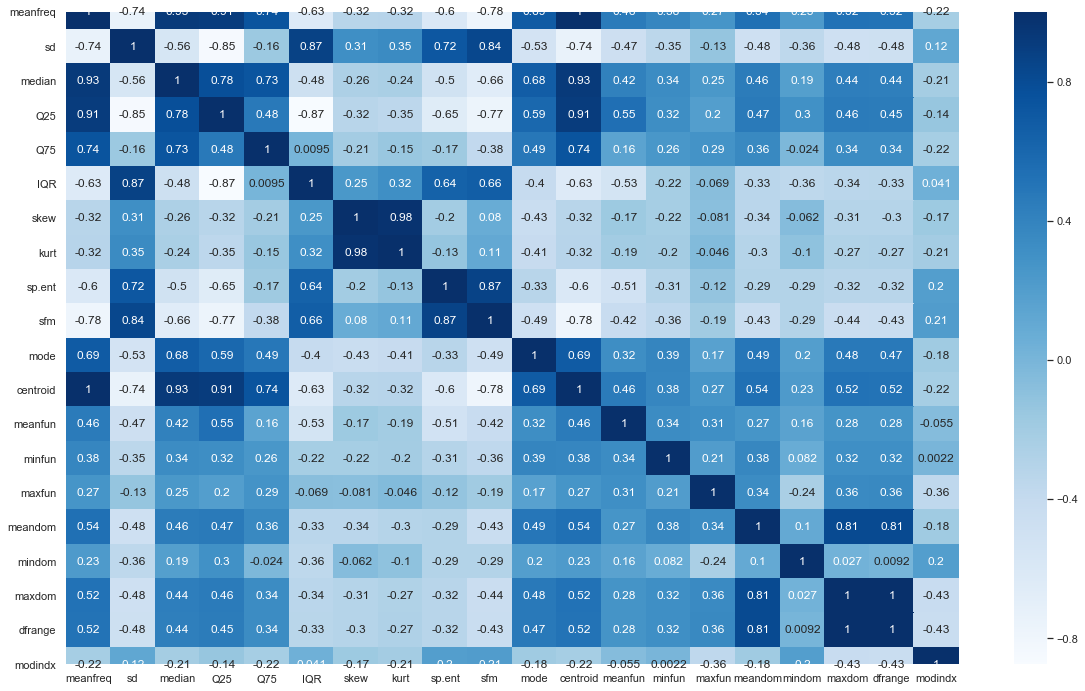

In [23]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [24]:
le=LabelEncoder()
df.label=le.fit_transform(df.label)

In [25]:
df.sample(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
35,0.159530,0.075273,0.146853,0.121399,0.239371,0.117972,1.993501,6.870351,0.921132,0.582531,...,0.159530,0.120254,0.018412,0.168421,0.372869,0.007812,2.609375,2.601562,0.216817,1
591,0.179253,0.087960,0.192787,0.123934,0.255797,0.131863,4.146401,32.391323,0.916256,0.573847,...,0.179253,0.123312,0.016615,0.266667,0.598437,0.007812,5.429688,5.421875,0.163133,1
697,0.156166,0.062736,0.171742,0.096276,0.194865,0.098589,3.563475,18.188101,0.883183,0.391122,...,0.156166,0.095125,0.039526,0.178571,0.364435,0.004883,0.849609,0.844727,0.391329,1
679,0.159321,0.063010,0.181556,0.098646,0.198300,0.099654,2.853819,12.155037,0.867335,0.315548,...,0.159321,0.100271,0.039841,0.270270,0.480143,0.097656,0.839844,0.742188,0.539188,1
752,0.165659,0.060267,0.174856,0.106296,0.207984,0.101687,1.806696,6.947012,0.929765,0.525731,...,0.165659,0.088102,0.026891,0.219178,0.543125,0.070312,4.320312,4.250000,0.085555,1


In [26]:
y=df.label
x=df.drop('label',axis=1)
y.shape,x.shape

((3166,), (3166, 20))

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)
xtrain.shape,ytrain.shape

((2532, 20), (2532,))

In [28]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [29]:
# Building ANN model

In [37]:
model=Sequential()
model.add(Dense(11, init='uniform',activation='relu',input_dim=xtrain.shape[1]))
model.add(Dense(6,init='uniform',activation='relu'))
model.add(Dense(1,init='uniform',activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(xtrain,ytrain,batch_size=10,epochs=200,validation_split=0.1)

Train on 2278 samples, validate on 254 samples
Epoch 1/200
2278/2278 [==============================] - 2s 946us/step - loss: 0.5360 - accuracy: 0.8196 - val_loss: 0.2759 - val_accuracy: 0.8976
Epoch 2/200
2278/2278 [==============================] - 1s 372us/step - loss: 0.1902 - accuracy: 0.9188 - val_loss: 0.1349 - val_accuracy: 0.9606
Epoch 3/200
2278/2278 [==============================] - 1s 266us/step - loss: 0.1173 - accuracy: 0.9671 - val_loss: 0.1025 - val_accuracy: 0.9646
Epoch 4/200
2278/2278 [==============================] - 1s 346us/step - loss: 0.0871 - accuracy: 0.9741 - val_loss: 0.0999 - val_accuracy: 0.9685
Epoch 5/200
2278/2278 [==============================] - 1s 296us/step - loss: 0.0792 - accuracy: 0.9772 - val_loss: 0.0968 - val_accuracy: 0.9724
Epoch 6/200
2278/2278 [==============================] - 1s 275us/step - loss: 0.0760 - accuracy: 0.9767 - val_loss: 0.0984 - val_accuracy: 0.9685
Epoch 7/200
2278/2278 [==============================] - 1s 380us/step 

Epoch 56/200
2278/2278 [==============================] - 1s 349us/step - loss: 0.0400 - accuracy: 0.9846 - val_loss: 0.0651 - val_accuracy: 0.9724
Epoch 57/200
2278/2278 [==============================] - 1s 303us/step - loss: 0.0399 - accuracy: 0.9842 - val_loss: 0.0632 - val_accuracy: 0.9724
Epoch 58/200
2278/2278 [==============================] - 1s 276us/step - loss: 0.0393 - accuracy: 0.9842 - val_loss: 0.0604 - val_accuracy: 0.9764
Epoch 59/200
2278/2278 [==============================] - 1s 352us/step - loss: 0.0382 - accuracy: 0.9838 - val_loss: 0.0631 - val_accuracy: 0.9764
Epoch 60/200
2278/2278 [==============================] - 0s 198us/step - loss: 0.0377 - accuracy: 0.9851 - val_loss: 0.0584 - val_accuracy: 0.9764
Epoch 61/200
2278/2278 [==============================] - 1s 229us/step - loss: 0.0371 - accuracy: 0.9846 - val_loss: 0.0573 - val_accuracy: 0.9764
Epoch 62/200
2278/2278 [==============================] - 1s 319us/step - loss: 0.0364 - accuracy: 0.9846 - val_

Epoch 111/200
2278/2278 [==============================] - 1s 289us/step - loss: 0.0218 - accuracy: 0.9934 - val_loss: 0.0563 - val_accuracy: 0.9764
Epoch 112/200
2278/2278 [==============================] - 1s 373us/step - loss: 0.0225 - accuracy: 0.9925 - val_loss: 0.0553 - val_accuracy: 0.9764
Epoch 113/200
2278/2278 [==============================] - 1s 227us/step - loss: 0.0215 - accuracy: 0.9939 - val_loss: 0.0545 - val_accuracy: 0.9764
Epoch 114/200
2278/2278 [==============================] - 1s 271us/step - loss: 0.0227 - accuracy: 0.9930 - val_loss: 0.0564 - val_accuracy: 0.9764
Epoch 115/200
2278/2278 [==============================] - 1s 352us/step - loss: 0.0207 - accuracy: 0.9947 - val_loss: 0.0563 - val_accuracy: 0.9764
Epoch 116/200
2278/2278 [==============================] - 0s 204us/step - loss: 0.0201 - accuracy: 0.9930 - val_loss: 0.0585 - val_accuracy: 0.9724
Epoch 117/200
2278/2278 [==============================] - 1s 337us/step - loss: 0.0204 - accuracy: 0.9939

Epoch 166/200
2278/2278 [==============================] - 1s 274us/step - loss: 0.0145 - accuracy: 0.9965 - val_loss: 0.0666 - val_accuracy: 0.9724
Epoch 167/200
2278/2278 [==============================] - 1s 296us/step - loss: 0.0145 - accuracy: 0.9960 - val_loss: 0.0678 - val_accuracy: 0.9764
Epoch 168/200
2278/2278 [==============================] - 1s 271us/step - loss: 0.0135 - accuracy: 0.9965 - val_loss: 0.0683 - val_accuracy: 0.9724
Epoch 169/200
2278/2278 [==============================] - 1s 375us/step - loss: 0.0131 - accuracy: 0.9974 - val_loss: 0.0605 - val_accuracy: 0.9764
Epoch 170/200
2278/2278 [==============================] - 1s 232us/step - loss: 0.0134 - accuracy: 0.9969 - val_loss: 0.0634 - val_accuracy: 0.9764
Epoch 171/200
2278/2278 [==============================] - 1s 264us/step - loss: 0.0135 - accuracy: 0.9965 - val_loss: 0.0599 - val_accuracy: 0.9764
Epoch 172/200
2278/2278 [==============================] - 1s 285us/step - loss: 0.0130 - accuracy: 0.9974

In [38]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


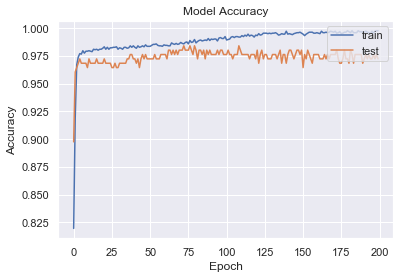

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc='upper right')
plt.show()

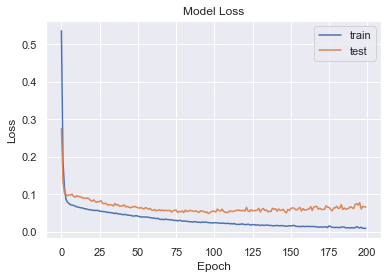

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','test'],loc='upper right')
plt.show()

In [47]:
pred=model.predict(xtest)
pred=np.round(pred)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       302
           1       0.99      0.97      0.98       332

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



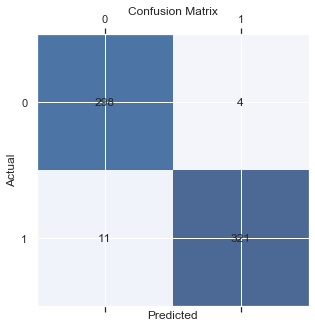

In [50]:
cm=confusion_matrix(ytest,pred)
fig,ax=plt.subplots(figsize=(5,5))
ax.matshow(cm,cmap=plt.cm.Blues,alpha=0.7)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j,y=i,s=cm[i,j],va='center',ha='center')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()